# Challenge 1: Prepare Textual Data for Analysis

In this challenge, we will walk you through how to prepare raw text data for NLP analysis. Due to time limitation, we will cover **text cleaning, tokenization, stemming, lemmatization, and stop words removal** but skip POS tags, named entity recognition, and trunking. The latter 3 steps are more advanced and not required for our next challenge on sentiment analysis. 

## Objectives

* Learn how to prepare text data for NLP analysis in Python
* Write the functions you will use in Challenge 3 for cleaning, tokenizing, stemming, and lemmatizing data.

## Text Cleaning

Text cleaning is also called text cleansing. The goal is to clean up the messy real-world textual data in order to improve the text analysis accuracy at later steps. For generic textual data sources, we usually need to fix the following problems:

* Missing values
* Special characters
* Numbers

For web data, we need to additinally fix:

* HTML tags
* JavaScripts
* CSS
* URLs

Case by case, there may also be special problems we need to fix for certain types of data. For instance, for Twitter tweets data we need to fix hashtags and the Twitter handler including a *@* sign and Twitter usernames.

In addition, we also need to convert the texts to lower cases so that when we anaylize the words later, NLTK will not think *Ironhack* and *ironhack* mean different things.

Note that the above are the general steps to clean up data for NLP analysis. In specific cases, not all those steps apply. For example, if you are analyzing textual data on history, you probably don't want to remove numbers because numbers (such as years and dates) are important in history. Besides, if you are doing something like network analysis on web data, you may want to retain hyperlinks so that you will be able to extract the outbounding links in the next steps. Sometimes you may also need to do some cleaning first, then extract some features, then do more cleaning, then extract more features. You'll have to make these judgments by yourself case by case. 

In this challenge we are keeping things relatively simple so **you only need to clean up special characters, numbers, and URLs**. Let's say you have the following messy string to clean up:

```
@Ironhack's-#Q website 776-is http://ironhack.com [(2018)]")
```

You will write a function, which will be part of you NLP analysis pipeline in the next challenge, to clean up strings like above and output:

```
ironhack s  q website  is
```

**In the cell below, write a function called `clean_up`**. Test your function with the above string and make sure you receive the expected output.

*Notes:*

* Use regular expressions to identify URL patterns and remove URLs.

* You don't want to replace special characters/numbers with an empty string. Because that will join words that shouldn't be joined. For instance, if you replace the `'` in `you're`, you will get `youre` which is undesirable. So instead, replace special characters and numbers with a whitespace.

* The order matters in terms of what to clean before others. For example, if you clean special characters before URLs, it will be difficult to identify the URLs patterns.

* Don't worry about single letters and multiple whitespaces in your returned string. In our next steps those issues will be fixed.

In [1]:
import re

In [2]:
def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string."""
    
    list_to_sub=['\d','http?:\/\/.*[\d]*','@','\W']
    
    """
    Args:
        s: The string to be cleaned up."""
    for exp in list_to_sub:
        s= re.sub(exp, r' ', s).lower()

    """
    Returns:
        A string that has been cleaned up.
    """
    return(s)
        
    
clean_up('@Ironhack\'s-#Q website 776-is http://ironhack.com [(2018)]")')



' ironhack s  q website     is  '

## Tokenization

We have actually discussed the concept of tokenization in the Bag of Words lab before. In that lab, we did both tokenization and calculated the [matrix of document-term frequency](https://en.wikipedia.org/wiki/Document-term_matrix). In this lab, we only need tokenization.

In the cell below, write a function called **`tokenize`** to convert a string to a list of words. We'll use the string we received in the previous step *`ironhack s  q website  is`* to test your function. Your function shoud return:

```python
['ironhack', 's', 'q', 'website', 'is']
```

*Hint: use the `word_tokenize` function in NLTK.*

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/eleonore/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def tokenize(s):
    """
    Tokenize a string."""

    """
    Args:
        s: String to be tokenized."""
    list_s = nltk.word_tokenize(s)
    
    """
    Returns:
        A list of words as the result of tokenization.
    """
    return(list_s)
    
list_s = tokenize(clean_up(clean_up('@Ironhack\'s-#Q website 776-is http://ironhack.com [(2018)]")')))


## Stemming and Lemmatization

We will do stemming and lemmatization in the same step because otherwise we'll have to loop each token lists twice. You have learned in the previous challenge that stemming and lemmatization are similar but have different purposes for text normalization:

**Stemming reduces words to their root forms (stems) even if the stem itself is not a valid word**. For instance, *token*, *tokenize*, and *tokenization* will be reduced to the same stem - *token*. And *change*, *changed*, *changing* will be reduced to *chang*.

In NLTK, there are three stemming libraries: [*Porter*](https://www.nltk.org/_modules/nltk/stem/porter.html), [*Snowball*](https://www.nltk.org/_modules/nltk/stem/snowball.html), and [*Lancaster*](https://www.nltk.org/_modules/nltk/stem/lancaster.html). The difference among the three is the agressiveness with which they perform stemming. Porter is the most gentle stemmer that preserves the word's original form if it has doubts. In contrast, Lancaster is the most aggressive one that sometimes produces wrong outputs. And Snowball is in between. **In most cases you will use either Porter or Snowball**.

**Lemmatization differs from stemming in that lemmatization cares about whether the reduced form belongs to the target language and it often requires the context (i.e. POS or parts-of-speech) in order to perform the correct transformation**. For example, the [*Word Net lemmatizer* in NLTK](https://www.nltk.org/_modules/nltk/stem/wordnet.html) yields different results with and without being told that *was* is a verb:

```python
>>> from nltk.stem import WordNetLemmatizer
>>> lemmatizer = WordNetLemmatizer()
>>> lemmatizer.lemmatize('was')
'wa'
>>> lemmatizer.lemmatize('runs', pos='v')
'be'
```

In the cell below, import the necessary libraries and define a function called `stem_and_lemmatize` that performs both stemming and lemmatization on a list of words. Don't worry about the POS part of lemmatization for now.

## PMI = Pointwise Mutual Information. se calcule. 
<a>https://en.wikipedia.org/wiki/Pointwise_mutual_information</a>
nb de fois qu'une occurence apparaît
les tops mots sont les locutions qui arr

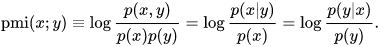



### Timeseries
- on prend les N première valeur sont les X et la valeur à prédire est le Y
- on peut transformer sa frame en df de machine learning
- cross-validation avec des slot de 2 heures.

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eleonore/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def stem_and_lemmatize(l):
    """
    Perform stemming and lemmatization on a list of words.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after being stemmed and lemmatized.
    """   
    ps = PorterStemmer()
    print([ps.stem(word) for word in l])
    
    lemmatizer = WordNetLemmatizer()
    print([lemmatizer.lemmatize(word) for word in l])
    
stem_and_lemmatize(list_s)    

['ironhack', 's', 'q', 'websit', 'is']
['ironhack', 's', 'q', 'website', 'is']


## Stop Words Removal

Stop Words are the most commonly used words in a language that don't contribute to the main meaning of the texts. Examples of English stop words are `i`, `me`, `is`, `and`, `the`, `but`, and `here`. We want to remove stop words from analysis because otherwise stop words will take the overwhelming portion in our tokenized word list and the NLP algorithms will have problems in identifying the truely important words.

NLTK has a `stopwords` package that allows us to import the most common stop words in over a dozen langauges including English, Spanish, French, German, Dutch, Portuguese, Italian, etc. These are the bare minimum stop words (100-150 words in each language) that can get beginners started. Some other NLP packages such as [*stop-words*](https://pypi.org/project/stop-words/) and [*wordcloud*](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) provide bigger lists of stop words.

Now in the cell below, create a function called `remove_stopwords` that loop through a list of words that have been stemmed and lemmatized to check and remove stop words. Return a new list where stop words have been removed.

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eleonore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def remove_stopwords(l):
    """
    Remove English stopwords from a list of strings.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after stop words are removed.
    """
    filtered_sentence=[]
    stop_words = set(stopwords.words('english'))
    for w in l: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    print(filtered_sentence)    
    
remove_stopwords(list_s)

['ironhack', 'q', 'website']


## Summary

In this challenge you have learned several text preparation techniques in more depths including text cleaning, tokenization, stemming, lemmatization, and stopwords removal. You have also written the functions you will be using in the next challenge to prepare texts for NLP analysis. Now we are ready to move on to the next challenge - Sentiment Analysis.